In [2]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import missingno as msno
from scipy import stats

import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import precision_score
from sklearn.metrics import precision_score

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



# Import recall_score
from sklearn.metrics import recall_score

#from sklearn.metrics import roc_auc_curve
# Import roc_curve
from sklearn.metrics import roc_curve



from sklearn.svm import SVC

# Import confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus



# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



import scipy.stats as st
#import pandas_profiling
import requests 
%matplotlib inline

# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [3]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)


In [4]:
# Semester End Date:
EndDate = '2019-01-21' 
EndDate = pd.to_datetime(EndDate)

In [5]:
TriOne = '2018-10-22'
TriOne = pd.to_datetime(TriOne)

In [6]:
TriTwo = '2018-11-26'
TriTwo = pd.to_datetime(TriTwo)

In [7]:
# Data Preperation Module 2
# There are two files in module 2
# Module 2

module2mg = pd.read_csv('Module2-MoodleGrades.csv')

In [8]:
module2ml = pd.read_csv('Module2-MoodleLog.csv')

In [9]:
module2mg['Course total (Real)'].mean()

55.66528985507248

In [9]:
module2mg.head(2)

,First name,Surname,ID number,Email address,Quiz: CA3 - QUIZ (Real),Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real),Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real),Course total (Real),Last downloaded from this course
0,a8NM,bDqB,U8NMDqBG,U8NMDqBG@student.itb.ie,7.30,13,32,52.30,1548158947
1,aSnR,bGk9,VSnRGk9O,VSnRGk9O@student.itb.ie,8.55,10,38,56.55,1548158947


In [10]:
module2ml.head(2)

,Time,User full name,Affected user,Event context,Component,Event name,Description,IP address,Origin
0,"22/01/19, 10:54",a5VI bsY8,-,File: Academic Calendar 2018 -19,File,Course module viewed,The user with id '0' viewed the 'resource' act...,127.0.0.1,web
1,"22/01/19, 10:53",a5VI bsY8,-,Course: Module 2,System,Course viewed,The user with id '0' viewed the course with id...,127.0.0.1,web


In [11]:
# Time2
time2 = module2ml["Time"].str.split(",", n = 1, expand = True)


In [12]:
# making separate Date column from new data frame 
module2ml["Date"]= time2[0] 

# making seperate Time column from new data frame
module2ml['Time']= time2[1]


In [13]:
# Convert the date column to datetime64
module2ml.Date = pd.to_datetime(module2ml.Date)


In [14]:
#Remove activity outside semester start and end dates range -Timeedit2
mask2 = (module2ml['Date'] >= StartDate) & (module2ml['Date'] <= EndDate)

module2ml = module2ml.loc[mask2]

len(module2ml)

15794

In [15]:
#Remove activity outside semester start and end dates range -Timeedit1
week5_2 = (module2ml['Date'] >= StartDate) & (module2ml['Date'] <= TriOne)

FirstFive2 = module2ml.loc[week5_2]

len(FirstFive2)


7508

In [16]:
#Remove activity outside semester start and end dates range -Timeedit1
week10_2 = (module2ml['Date'] >= TriOne) & (module2ml['Date'] <= TriTwo)

FirstTen2 = module2ml.loc[week10_2]

len(FirstTen2)


4084

In [17]:
#Remove activity outside semester start and end dates range -Timeedit1
week15_2 = (module2ml['Date'] >= TriTwo) & (module2ml['Date'] <= EndDate)

FirstFivt2 = module2ml.loc[week15_2]

len(FirstFivt2)


4826

In [18]:
print (module2mg.columns.tolist())
# Note Quiz: CA3 - QUIZ  (Real) has a couple of spaces in it

['First name', 'Surname', 'ID number', 'Email address', 'Quiz: CA3 - QUIZ  (Real)', 'Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)', 'Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)', 'Course total (Real)', 'Last downloaded from this course']


In [19]:
# Print the number of unique values in each modul2mg column
print(module2mg.nunique())

First name                                                          138
Surname                                                             138
ID number                                                           138
Email address                                                       138
Quiz: CA3 - QUIZ  (Real)                                             81
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)     18
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)          34
Course total (Real)                                                 118
Last downloaded from this course                                      1
dtype: int64


In [20]:
# Print the number of unique values in each modul2ml column
print(module2ml.nunique())

Time              1142
User full name     138
Affected user        1
Event context       66
Component            9
Event name          25
Description         31
IP address           1
Origin               2
Date                88
dtype: int64


In [21]:
# Cleanup2
module2ml = module2ml.drop(module2ml[['IP address','Origin','Description','Affected user']], axis=1)

In [22]:
module2ml.dtypes

Time                      object
User full name            object
Event context             object
Component                 object
Event name                object
Date              datetime64[ns]
dtype: object

In [23]:
# new data frame with split value columns 
new2 = module2ml["User full name"].str.split(" ", n = 1, expand = True)


In [24]:
# making separate first name column from new data frame 
module2ml["First name"]= new2[0] 

# making separate last name column from new data frame 
module2ml["Last name"]= new2[1] 


In [25]:
module2ml.dtypes

Time                      object
User full name            object
Event context             object
Component                 object
Event name                object
Date              datetime64[ns]
First name                object
Last name                 object
dtype: object

In [26]:
module2ml.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
4,20:32,ae3w bhew,Course: Module 2,System,Course user report viewed,2019-01-21,ae3w,bhew
5,17:39,agtk bqpc,Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE W...,Assignment,The status of the submission has been viewed.,2019-01-21,agtk,bqpc


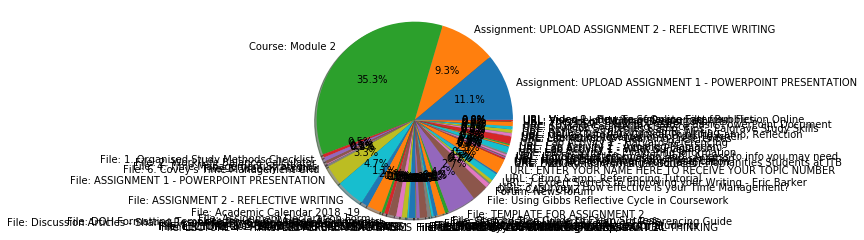

In [27]:
labels = module2ml['Event context'].astype('category').cat.categories.tolist()
counts = module2ml['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [28]:
module2ml["Event context"].value_counts()
# The Most frequent are assignment: upload assignment 1
# 

Course: Module 2                                                               5576
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION                      1754
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING                           1474
File: ASSIGNMENT 2 - REFLECTIVE WRITING                                         745
File: TEMPLATE FOR ASSIGNMENT 2                                                 727
File: ASSIGNMENT 1 - POWERPOINT PRESENTATION                                    529
File: Using Gibbs Reflective Cycle in Coursework                                426
URL: ENTER YOUR NAME HERE TO RECEIVE YOUR TOPIC NUMBER                          389
File: Assignment Declaration Form                                               387
File: ITB Harvard Referencing Guide                                             206
File: Sample Presentation Layout                                                202
File: Lab Activity 2 - Evaluating Information                               

In [29]:
module2ml["Event name"].value_counts()
# Actions


Course module viewed                                      6916
Course viewed                                             4507
The status of the submission has been viewed.             1508
Submission form viewed.                                    461
Grade user report viewed                                   422
A file has been uploaded.                                  317
A submission has been submitted.                           317
The user has accepted the statement of the submission.     308
Submission created.                                        256
Role assigned                                              135
User enrolled in course                                    135
Course user report viewed                                  126
User list viewed                                            94
Course module instance list viewed                          79
Discussion viewed                                           70
Submission updated.                                    

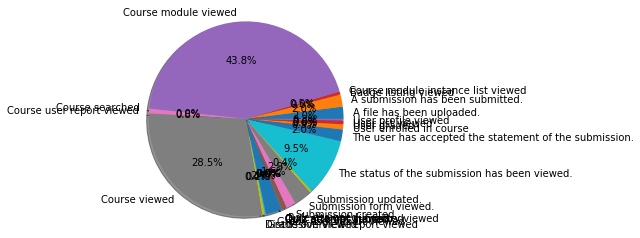

In [29]:
labels = module2ml['Event name'].astype('category').cat.categories.tolist()
counts = module2ml['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [30]:
m2mg = module2mg[[ 'First name', 'Surname','ID number','Quiz: CA3 - QUIZ  (Real)','Course total (Real)','Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)','Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)']]
#'Quiz: CA3 - QUIZ (Real) , Quiz: CA3 - QUIZ (Real) not in index
# Tidy up on colums without 

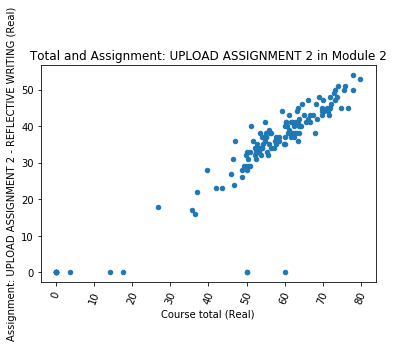

In [37]:
m2mg.plot(kind='scatter', x='Course total (Real)', y='Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)', rot=70)
plt.title(' Total and Assignment: UPLOAD ASSIGNMENT 2 in Module 2 ')



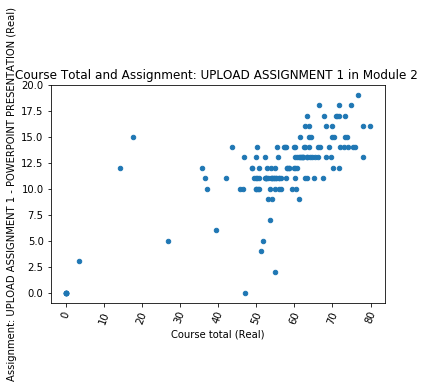

In [38]:
m2mg.plot(kind='scatter', x='Course total (Real)', y='Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)', rot=70)
plt.title('Course Total and Assignment: UPLOAD ASSIGNMENT 1 in Module 2 ')



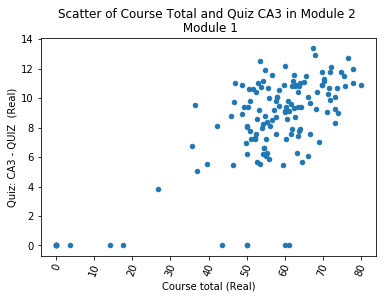

In [31]:
m2mg.plot(kind='scatter', x='Course total (Real)', y='Quiz: CA3 - QUIZ  (Real)', rot=70)
plt.title('Scatter of Course Total and Quiz CA3 in Module 2 \n Module 1')



In [35]:
plt.show()

In [32]:
module2ml.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
4,20:32,ae3w bhew,Course: Module 2,System,Course user report viewed,2019-01-21,ae3w,bhew
5,17:39,agtk bqpc,Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE W...,Assignment,The status of the submission has been viewed.,2019-01-21,agtk,bqpc


In [39]:
#
#Engaged = > 55
engaged2 = module2mg['Course total (Real)'] > 55


In [40]:

# Create a new column called df.engaged where the value is yes
# if Course Total Real is less than 55 and no if not
module2mg['engaged'] = np.where(module2mg['Course total (Real)']>=55, '1', '0')




In [41]:
module2mg['engaged'] = pd.to_numeric(module2mg['engaged'])

In [46]:
module2mg.head(2)

,First name,Surname,ID number,Email address,Quiz: CA3 - QUIZ (Real),Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real),Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real),Course total (Real),Last downloaded from this course,engaged
0,a8NM,bDqB,U8NMDqBG,U8NMDqBG@student.itb.ie,7.30,13,32,52.30,1548158947,0
1,aSnR,bGk9,VSnRGk9O,VSnRGk9O@student.itb.ie,8.55,10,38,56.55,1548158947,1


In [43]:
disengaged2 = module2mg['Course total (Real)'] < 55

In [47]:
disengaged2.count()

138

In [48]:
engaged2.count()

138

In [49]:
print(module2mg['engaged'].value_counts(dropna=False))

1    84
0    54
Name: engaged, dtype: int64


In [50]:
module2mg.dtypes

First name                                                           object
Surname                                                              object
ID number                                                            object
Email address                                                        object
Quiz: CA3 - QUIZ  (Real)                                            float64
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)      int64
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)           int64
Course total (Real)                                                 float64
Last downloaded from this course                                      int64
engaged                                                               int64
dtype: object

In [51]:
m2mg_subset = module2mg.drop(module2mg[['Email address','Last downloaded from this course']], axis=1)
#dropcolumnsm2mg

In [52]:
m2mg_subset.dtypes

First name                                                           object
Surname                                                              object
ID number                                                            object
Quiz: CA3 - QUIZ  (Real)                                            float64
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)      int64
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)           int64
Course total (Real)                                                 float64
engaged                                                               int64
dtype: object

In [53]:
spear1 = m2mg_subset['Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)']

In [54]:
spear2 = m2mg_subset['Course total (Real)']

In [55]:
spearcorr = stats.spearmanr(spear1,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=0.9245499104402608, pvalue=7.6411144460062279e-59)


In [56]:
spear11 = m2mg_subset['Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)']

In [57]:
spearcorr = stats.spearmanr(spear11,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=0.71937594819757467, pvalue=2.8329543103500104e-23)


In [58]:
spear111 = m2mg_subset['Quiz: CA3 - QUIZ  (Real)']

In [59]:
pearcorr = stats.pearsonr(spear111, spear2)
print(pearcorr)

(0.72451311537575958, 9.8108692309251287e-24)


In [60]:
m2mg_subset.head(2)

,First name,Surname,ID number,Quiz: CA3 - QUIZ (Real),Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real),Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real),Course total (Real),engaged
0,a8NM,bDqB,U8NMDqBG,7.30,13,32,52.30,0
1,aSnR,bGk9,VSnRGk9O,8.55,10,38,56.55,1


In [61]:
Xm2mg = m2mg_subset.iloc[:,3:6]  #independent columns
ym2mg = m2mg_subset.iloc[:,-1]    #target column i.e engaged


In [62]:
Xm2mg.head(2)

,Quiz: CA3 - QUIZ (Real),Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real),Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)
0,7.30,13,32
1,8.55,10,38


In [63]:
ym2mg.head(2)

0    0
1    1
Name: engaged, dtype: int64

In [64]:
#apply SelectKBest class to extract top 4 best features
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(Xm2mg,ym2mg)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xm2mg.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                               Specs       Score
2  Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE W...  255.571899
1  Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT P...   59.808132
0                           Quiz: CA3 - QUIZ  (Real)   33.564287


[ 0.17057414  0.27125829  0.55816758]


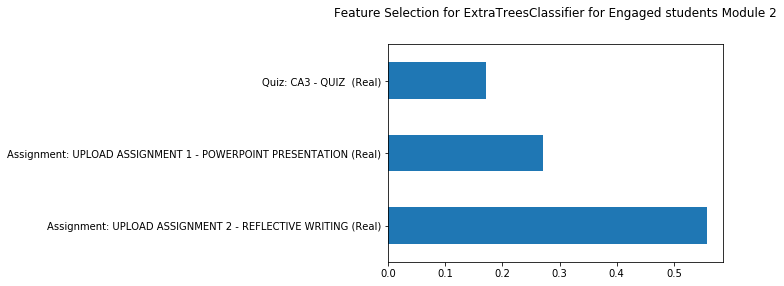

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xm2mg,ym2mg)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xm2mg.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Selection for ExtraTreesClassifier for Engaged students Module 2', y=1.1)
plt.show()


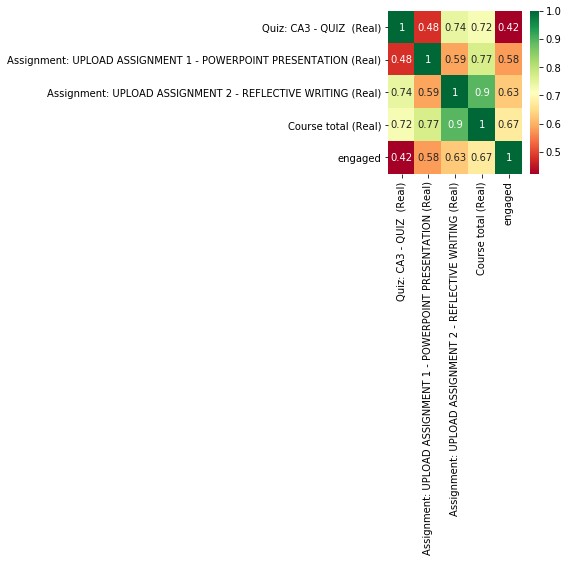

In [66]:
#get correlations of each features in dataset
corrmat = m2mg_subset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(3,3))
#plot heat map
g=sns.heatmap(m2mg_subset[top_corr_features].corr(),annot=True,cmap="RdYlGn")



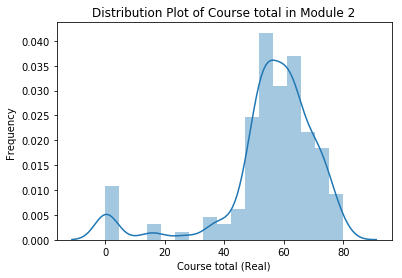

In [67]:
sns.distplot(m2mg['Course total (Real)'])
plt.title('Distribution Plot of Course total in Module 2')
plt.ylabel('Frequency ')

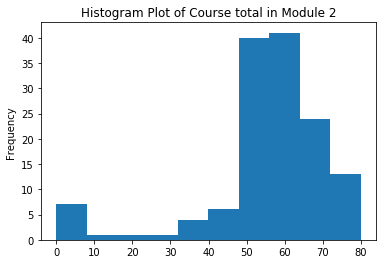

In [68]:
module2mg['Course total (Real)'].plot('hist')
plt.title('Histogram Plot of Course total in Module 2')
plt.ylabel('Frequency ')

In [69]:
module2ml.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
4,20:32,ae3w bhew,Course: Module 2,System,Course user report viewed,2019-01-21,ae3w,bhew
5,17:39,agtk bqpc,Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE W...,Assignment,The status of the submission has been viewed.,2019-01-21,agtk,bqpc


In [70]:
module2ml['Event context'].value_counts(dropna=False).head()

Course: Module 2                                             5576
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION    1754
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING         1474
File: ASSIGNMENT 2 - REFLECTIVE WRITING                       745
File: TEMPLATE FOR ASSIGNMENT 2                               727
Name: Event context, dtype: int64

In [71]:
module2ml['Event name'].value_counts(dropna=False).head()

Course module viewed                             6916
Course viewed                                    4507
The status of the submission has been viewed.    1508
Submission form viewed.                           461
Grade user report viewed                          422
Name: Event name, dtype: int64

In [72]:
module2ml['User full name'].value_counts(dropna=False).head()

an9y b7rk    483
aiG1 bhcI    301
ag2x bJ2S    209
aoJd bWB4    208
aejK bpyi    207
Name: User full name, dtype: int64

In [73]:
# Selecting columns
m2ml = module2ml[[ 'Time','User full name','Event context','Component','Event name','Date','First name','Last name']]

In [74]:
m2ml.describe().transpose()
# Most frequent student = an9y b7rk
# Course Module 2 most viewed
# 

#Attribute Information:

#Affected user: It contains the name of the user if the action is related to them.This has been removed as it is blank
#Time: It contains the date, month and time stamp of the log entry when it was recorded. (Year infomration may or may not be included)
#User full name: Name of the user is listed in this column.
#Event context: It displays the name of the activity or resource. Ex: Course: Module 2 was most frequent
#Component: It displays the type of the activity or resource. Ex: File, System, Assignment, Quiz ... System was most frequent
#Event name: Displays in relation to users' actions.A user can do CRUD actions in Moodle - Create, View, Update and Delete.Course module viewed is the most popular
#Description: It contains descriptive information about the action performed by the user.This will be removed
#IP address: Shows the IP address of the user.This will be removed as this does not provide any information
#Origin: It indicates whether the user performed an action using a desktop/laptop or mobile. Any user activity from a mobile device will be recorded as 'ws'.


,count,unique,top,freq,first,last
Time,15794,1142,12:07,105,NaN,NaN
User full name,15794,138,an9y b7rk,483,NaN,NaN
Event context,15794,66,Course: Module 2,5576,NaN,NaN
Component,15794,9,File,5091,NaN,NaN
Event name,15794,25,Course module viewed,6916,NaN,NaN
Date,15794,88,2018-10-18 00:00:00,1583,2018-09-18 00:00:00,2019-01-21 00:00:00
First name,15794,138,an9y,483,NaN,NaN
Last name,15794,138,b7rk,483,NaN,NaN


In [76]:
m2ml.head()

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
4,20:32,ae3w bhew,Course: Module 2,System,Course user report viewed,2019-01-21,ae3w,bhew
5,17:39,agtk bqpc,Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE W...,Assignment,The status of the submission has been viewed.,2019-01-21,agtk,bqpc
6,17:37,aiJL bn2Z,File: ITB Harvard Referencing Guide,File,Course module viewed,2019-01-21,aiJL,bn2Z
7,17:37,aiJL bn2Z,Course: Module 2,System,Course viewed,2019-01-21,aiJL,bn2Z
8,15:04,aAWa b0mw,Course: Module 2,User report,Grade user report viewed,2019-01-21,aAWa,b0mw


In [59]:
m2ml.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
4,20:32,ae3w bhew,Course: Module 2,System,Course user report viewed,2019-01-21,ae3w,bhew
5,17:39,agtk bqpc,Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE W...,Assignment,The status of the submission has been viewed.,2019-01-21,agtk,bqpc


In [60]:
m2mg.head(2)

,First name,Surname,ID number,Quiz: CA3 - QUIZ (Real),Course total (Real),Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real),Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)
0,a8NM,bDqB,U8NMDqBG,7.30,52.30,13,32
1,aSnR,bGk9,VSnRGk9O,8.55,56.55,10,38


In [61]:
m2mg.describe()

,Quiz: CA3 - QUIZ (Real),Course total (Real),Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real),Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)
count,138.000000,138.000000,138.000000,138.000000
mean,8.273913,55.665290,11.739130,34.572464
std,3.370353,16.672961,3.897041,12.775940
min,0.000000,0.000000,0.000000,0.000000
25%,7.212500,51.800000,11.000000,32.250000
50%,9.175000,58.100000,12.000000,37.000000
75%,10.737500,64.587500,14.000000,42.000000
max,13.400000,79.900000,19.000000,54.000000


In [ ]:
#
#
#

In [77]:
m2ml_subset = module2ml

In [78]:
m2ml_subset.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
4,20:32,ae3w bhew,Course: Module 2,System,Course user report viewed,2019-01-21,ae3w,bhew
5,17:39,agtk bqpc,Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE W...,Assignment,The status of the submission has been viewed.,2019-01-21,agtk,bqpc


In [79]:
module2ml_onehot = m2ml_subset.copy()
module2ml_onehot = pd.get_dummies(module2ml_onehot, columns=['Event name'], prefix = ['Event name'])
module2ml_onehot = pd.get_dummies(module2ml_onehot, columns=['Event context'], prefix = ['Event context'])
module2ml_onehot = pd.get_dummies(module2ml_onehot, columns=['Component'], prefix = ['Component'])


print(module2ml_onehot.head())

### Onehot2
#
# One-Hot encoding
# The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.
# This has the benefit of not weighting a value improperly.
# https://www.datacamp.com/community/tutorials/categorical-data

     Time User full name       Date First name Last name  \
4   20:32      ae3w bhew 2019-01-21       ae3w      bhew   
5   17:39      agtk bqpc 2019-01-21       agtk      bqpc   
6   17:37      aiJL bn2Z 2019-01-21       aiJL      bn2Z   
7   17:37      aiJL bn2Z 2019-01-21       aiJL      bn2Z   
8   15:04      aAWa b0mw 2019-01-21       aAWa      b0mw   

   Event name_A file has been uploaded.  \
4                                     0   
5                                     0   
6                                     0   
7                                     0   
8                                     0   

   Event name_A submission has been submitted.  \
4                                            0   
5                                            0   
6                                            0   
7                                            0   
8                                            0   

   Event name_Badge listing viewed  \
4                                0   
5  

In [80]:
module2ml_onehot.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,...,Event context_URL: Video 2 - Beware of Online Filter Bubbles,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_System,Component_URL,Component_User report
4,20:32,ae3w bhew,2019-01-21,ae3w,bhew,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,17:39,agtk bqpc,2019-01-21,agtk,bqpc,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [81]:
m2mg_subset.head(2)

,First name,Surname,ID number,Quiz: CA3 - QUIZ (Real),Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real),Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real),Course total (Real),engaged
0,a8NM,bDqB,U8NMDqBG,7.30,13,32,52.30,0
1,aSnR,bGk9,VSnRGk9O,8.55,10,38,56.55,1


In [82]:
#Merge_subset2
merge_subset2 = pd.merge(module2ml_onehot,m2mg_subset[['First name','engaged']],on='First name', how='left')

In [138]:
merge_subset2.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,...,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_System,Component_URL,Component_User report,engaged
0,20:32,ae3w bhew,2019-01-21,ae3w,bhew,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,17:39,agtk bqpc,2019-01-21,agtk,bqpc,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [139]:
X2s = merge_subset2.iloc[:,5:105]  #independent columns
y2s = merge_subset2.iloc[:,-1]    #target column i.e engaged


In [140]:
y2s.head(2)

0    1
1    1
Name: engaged, dtype: int64

In [141]:
X2s.head(2)

,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course searched,Event name_Course user report viewed,Event name_Course viewed,Event name_Discussion viewed,Event name_Grade overview report viewed,...,Event context_URL: Video 2 - Beware of Online Filter Bubbles,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_System,Component_URL,Component_User report
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [142]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X2s,y2s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X2s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                                Specs      Score
10                Event name_Grade user report viewed  30.568689
99                              Component_User report  30.568689
9             Event name_Grade overview report viewed  26.332493
95                          Component_Overview report  26.332493
50  Event context_File: Lab Activity 2 - Evaluatin...  22.437705
94                                    Component_Forum  18.971810
7                            Event name_Course viewed  17.177583
97                                   Component_System  15.435105
61                    Event context_Forum: News forum  13.731214
83  Event context_URL: Reflective Thinking &amp; W...  11.877787


[  4.27314798e-04   5.46566991e-04   6.60206260e-05   2.50090205e-02
   9.60591261e-03   4.00021753e-03   5.08869801e-03   3.00077545e-02
   8.01545683e-03   3.72871959e-02   5.36541411e-02   5.94273625e-04
   9.78446777e-04   1.21425997e-03   1.33321697e-03   2.48733931e-03
   8.54506072e-04   1.66775335e-03   6.78455542e-03   2.07591738e-02
   1.83230609e-03   2.46717126e-03   1.41913429e-03   2.81241195e-02
   3.91768905e-03   1.36826367e-02   7.94132061e-03   1.91467116e-02
   1.70667773e-02   2.94122239e-02   2.11184953e-02   6.36145465e-03
   9.09286104e-04   2.24398838e-03   2.17457119e-02   2.99097912e-03
   2.22680461e-03   2.46464426e-03   1.48867980e-02   9.85168672e-05
   2.57423882e-02   6.16788428e-03   3.69554115e-05   2.50470306e-03
   4.61043070e-03   4.70123351e-03   6.22202391e-04   1.29500650e-02
   5.09000673e-04   1.69348774e-02   6.66264897e-02   1.85487528e-03
   5.41340691e-03   5.87899483e-04   4.08251737e-03   1.67335367e-02
   3.36000818e-03   7.82228659e-04

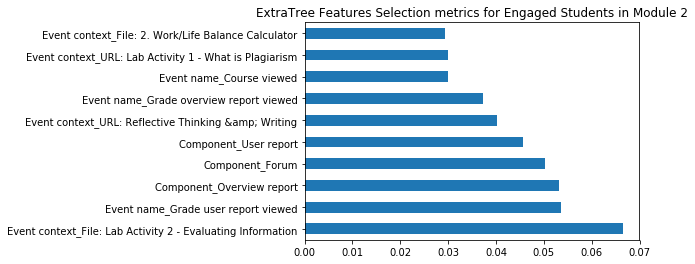

In [143]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X2s,y2s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X2s.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('ExtraTree Features Selection metrics for Engaged Students in Module 2')
plt.show()


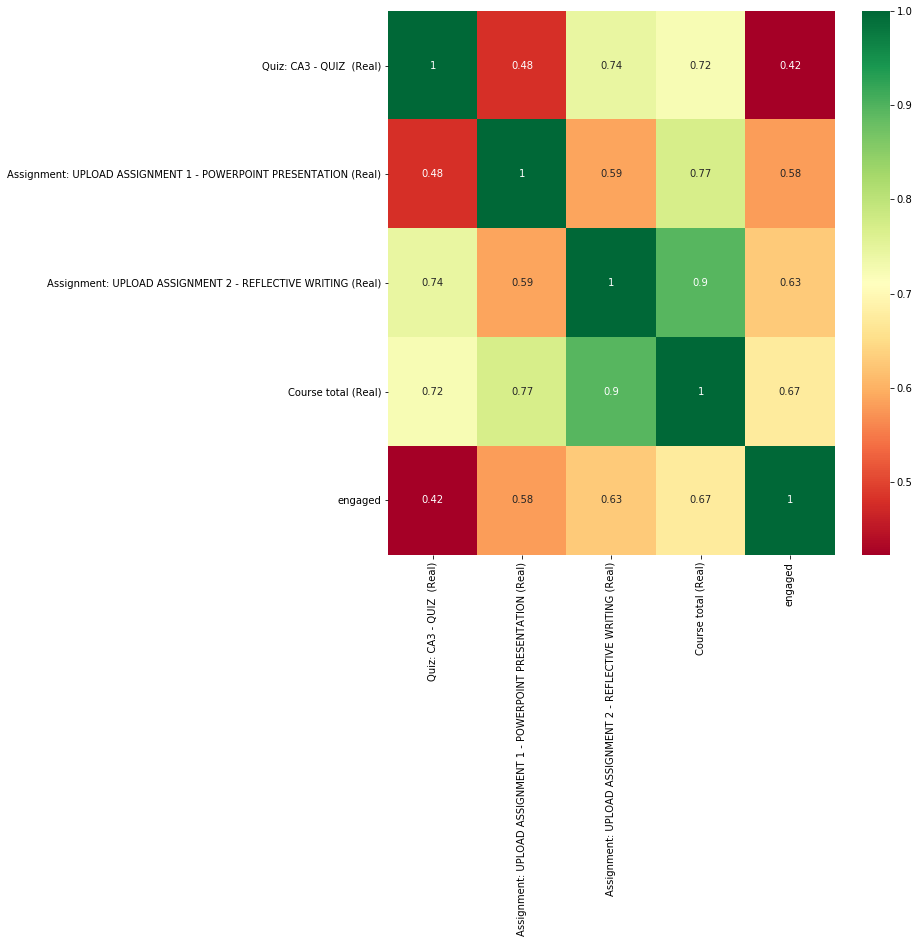

In [144]:
#get correlations of each features in dataset
corrmat = m2mg_subset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(m2mg_subset[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [145]:
merge_subset2.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,...,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_System,Component_URL,Component_User report,engaged
0,20:32,ae3w bhew,2019-01-21,ae3w,bhew,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,17:39,agtk bqpc,2019-01-21,agtk,bqpc,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [146]:
merge_subset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15794 entries, 0 to 15793
Columns: 106 entries, Time to engaged
dtypes: datetime64[ns](1), int64(1), object(4), uint8(100)
memory usage: 3.0+ MB


In [91]:
spear3 = merge_subset2['Event context_File: Lab Activity 2 - Evaluating Information']

In [92]:
spear33 = merge_subset2['engaged']

In [93]:
spearcorr = stats.spearmanr(spear3,spear33)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=0.03793119482591862, pvalue=1.8577735141019193e-06)


In [156]:
spear4 = merge_subset2['Component_User report']

In [157]:
spearcorr = stats.spearmanr(spear4,spear33)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=-0.044593670622965736, pvalue=2.0631777007073573e-08)


In [74]:
# EndofFS2
##
###
#                       10                Event name_Grade user report viewed  30.568689
#99                              Component_User report  30.568689
#9             Event name_Grade overview report viewed  26.332493
#95                          Component_Overview report  26.332493
#50  Event context_File: Lab Activity 2 - Evaluatin...  22.437705
#94                                    Component_Forum  18.971810
#7                            Event name_Course viewed  17.177583
#97                                   Component_System  15.435105
#61                    Event context_Forum: News forum  13.731214
#83  Event context_URL: Reflective Thinking &amp; W...  11.877787                          

In [158]:
merge_subset2.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,...,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_System,Component_URL,Component_User report,engaged
0,20:32,ae3w bhew,2019-01-21,ae3w,bhew,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,17:39,agtk bqpc,2019-01-21,agtk,bqpc,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [164]:
# Print the number of unique values in each modul1lg column
print(merge_subset2.nunique())

Time                                                                             1142
User full name                                                                    138
Date                                                                               88
First name                                                                        138
Last name                                                                         138
Event name_A file has been uploaded.                                                2
Event name_A submission has been submitted.                                         2
Event name_Badge listing viewed                                                     2
Event name_Course module instance list viewed                                       2
Event name_Course module viewed                                                     2
Event name_Course searched                                                          2
Event name_Course user report viewed                  

In [165]:
merge_subset2.columns

Index(['Time', 'User full name', 'Date', 'First name', 'Last name',
       'Event name_A file has been uploaded.',
       'Event name_A submission has been submitted.',
       'Event name_Badge listing viewed',
       'Event name_Course module instance list viewed',
       'Event name_Course module viewed',
       ...
       'Component_Assignment', 'Component_File', 'Component_File submissions',
       'Component_Forum', 'Component_Overview report', 'Component_Quiz',
       'Component_System', 'Component_URL', 'Component_User report',
       'engaged'],
      dtype='object', length=106)

In [166]:
module2ml["Event context"].value_counts()
# The Most frequent are assignment: upload assignment 1
# 

Course: Module 2                                                               5576
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION                      1754
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING                           1474
File: ASSIGNMENT 2 - REFLECTIVE WRITING                                         745
File: TEMPLATE FOR ASSIGNMENT 2                                                 727
File: ASSIGNMENT 1 - POWERPOINT PRESENTATION                                    529
File: Using Gibbs Reflective Cycle in Coursework                                426
URL: ENTER YOUR NAME HERE TO RECEIVE YOUR TOPIC NUMBER                          389
File: Assignment Declaration Form                                               387
File: ITB Harvard Referencing Guide                                             206
File: Sample Presentation Layout                                                202
File: Lab Activity 2 - Evaluating Information                               

In [167]:
#module2ml = module2ml.drop(module2ml[['IP address','Origin','Description','Affected user']], axis=1)

In [168]:
# making data frame from csv file 
d1 = pd.read_csv("Module2-MoodleLog.csv", index_col ="Event context" ) 
  
# dropping passed values 
d1.drop(["Name: Event context", "URL: Video 2 - Beware of Online Filter Bubbles", "File: Learning Preferences", 
                            "URL: Lab Activity 2 - Learning Preferences"], inplace = True) 
  
# display 
d1

,Time,User full name,Affected user,Component,Event name,Description,IP address,Origin
Event context,,,,,,,,
File: Academic Calendar 2018 -19,"22/01/19, 10:54",a5VI bsY8,-,File,Course module viewed,The user with id '0' viewed the 'resource' act...,127.0.0.1,web
Course: Module 2,"22/01/19, 10:53",a5VI bsY8,-,System,Course viewed,The user with id '0' viewed the course with id...,127.0.0.1,web
Course: Module 2,"22/01/19, 10:28",aBPm bhmN,-,User report,Grade user report viewed,The user with id '0' viewed the user report in...,127.0.0.1,ws
Course: Module 2,"22/01/19, 10:26",aBPm bhmN,-,System,Course viewed,The user with id '0' viewed the course with id...,127.0.0.1,ws
Course: Module 2,"21/01/19, 20:32",ae3w bhew,-,System,Course user report viewed,The user with id '0' viewed the user report fo...,127.0.0.1,web
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING,"21/01/19, 17:39",agtk bqpc,-,Assignment,The status of the submission has been viewed.,The user with id '0' has viewed the submission...,127.0.0.1,web
File: ITB Harvard Referencing Guide,"21/01/19, 17:37",aiJL bn2Z,-,File,Course module viewed,The user with id '0' viewed the 'resource' act...,127.0.0.1,web
Course: Module 2,"21/01/19, 17:37",aiJL bn2Z,-,System,Course viewed,The user with id '0' viewed the course with id...,127.0.0.1,web
Course: Module 2,"21/01/19, 15:04",aAWa b0mw,-,User report,Grade user report viewed,The user with id '0' viewed the user report in...,127.0.0.1,ws


In [170]:
#d1["Event context"].value_counts()
# The Most frequent are assignment: upload assignment 1

In [171]:
featselect33 = X2s[['Event context_File: Lab Activity 2 - Evaluating Information','Component_Overview report','Event name_Course viewed','Component_User report','Event context_File: 2. Work/Life Balance Calculator','Component_Forum','Event context_URL: Reflective Thinking &amp; Writing','Event name_Course module instance list viewed','Event context_URL: Lab Activity 1 - What is Plagiarism','Event context_File: ITB Harvard Referencing Guide']]

In [172]:
Xfs23 = featselect33 # Features
yfs23 = y2s # Target variable


In [173]:
# Split dataset into training set and test set
Xfs23_train, Xfs23_test, yfs23_train, yfs23_test = train_test_split(Xfs23, yfs23, test_size=0.3, random_state=1) # 70% training and 30% test


In [174]:
# Create Decision Tree classifer object
dtclffs23 = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtclffs23 = dtclffs23.fit(Xfs23_train,yfs23_train)

#Predict the response for test dataset
yfs23_pred = dtclffs23.predict(Xfs23_test)


In [175]:
# Compute accuracy
print(dtclffs23.score(Xfs23_train, yfs23_train))

0.648303934871


In [176]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yfs23_test, yfs23_pred))


Accuracy: 0.635155096012


In [177]:
#Recall Score
# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(yfs23_test, yfs23_pred))


0.968232958306


In [178]:
#Accuracy / Precision / Recall
print("Accuracy:",metrics.accuracy_score(yfs23_test, yfs23_pred))
print("Precision:",metrics.precision_score(yfs23_test, yfs23_pred))
print("Recall:",metrics.recall_score(yfs23_test, yfs23_pred))
# Recall: If there are student who are engaged in the test set and your DT model can identify it 98% of the time



Accuracy: 0.635155096012
Precision: 0.641807413907
Recall: 0.968232958306


In [179]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregfs23 = LogisticRegression()

# fit the model with data
logregfs23.fit(Xfs23_train,yfs23_train)

#
ylg23_pred=logregfs23.predict(Xfs23_test)


In [180]:
# Compute accuracy
print(logregfs23.score(Xfs23_train, yfs23_train))

0.648303934871


In [181]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(logregfs23, Xfs23_train, yfs23_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(logregfs23, Xfs23_train, yfs23_train, cv = 10)
print(np.mean(cvscores_10))

0.647037227661
0.646494668758


In [182]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yfs23_test, ylg23_pred))
print(classification_report(yfs23_test, ylg23_pred))


[[  84 1633]
 [  96 2926]]
             precision    recall  f1-score   support

          0       0.47      0.05      0.09      1717
          1       0.64      0.97      0.77      3022

avg / total       0.58      0.64      0.52      4739



In [126]:
#~~~~

In [183]:
#Precision Score
# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(yfs23_test, yfs23_pred))


0.641807413907


In [184]:
featselect2 = X2s[['Component_User report','Event name_Grade overview report viewed','Component_Overview report','Event context_File: Lab Activity 2 - Evaluating Information','Component_Forum','Event name_Course viewed','Component_System','Event context_Forum: News forum','Event context_URL: Reflective Thinking &amp; Writing']]

In [185]:
featselect2.head(2)

,Component_User report,Event name_Grade overview report viewed,Component_Overview report,Event context_File: Lab Activity 2 - Evaluating Information,Component_Forum,Event name_Course viewed,Component_System,Event context_Forum: News forum,Event context_URL: Reflective Thinking &amp; Writing
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0


In [186]:
Xfs2 = featselect2 # Features
yfs2 = y2s # Target variable


In [187]:
# Split dataset into training set and test set
Xfs2_train, Xfs2_test, yfs2_train, yfs2_test = train_test_split(Xfs2, yfs2, test_size=0.3, random_state=1) # 70% training and 30% test


In [190]:
# Create Decision Tree classifer object
dtclffs2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtclffs2 = dtclffs2.fit(Xfs2_train,yfs2_train)

#Predict the response for test dataset
yfs2_pred = dtclffs2.predict(Xfs2_test)


In [192]:
# Compute accuracy
print(dtclffs2.score(Xfs2_train, yfs2_train))

0.647942107644


In [80]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yfs2_test, yfs2_pred))


Accuracy: 0.634522051066


In [81]:
#Precision Score
# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(yfs2_test, yfs2_pred))


0.641014429383


In [82]:
#Recall Score
# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(yfs2_test, yfs2_pred))


0.970218398412


In [83]:
#Accuracy / Precision / Recall
print("Accuracy:",metrics.accuracy_score(yfs2_test, yfs2_pred))
print("Precision:",metrics.precision_score(yfs2_test, yfs2_pred))
print("Recall:",metrics.recall_score(yfs2_test, yfs2_pred))
# Recall: If there are student who are engaged in the test set and your DT model can identify it 98% of the time



Accuracy: 0.634522051066
Precision: 0.641014429383
Recall: 0.970218398412


In [84]:
print("Accuracy:",metrics.accuracy_score(yfs2_test, yfs2_pred))
print("Precision:",metrics.precision_score(yfs2_test, yfs2_pred))
print("Recall:",metrics.recall_score(yfs2_test, yfs2_pred))
print("F1 Score",metrics.f1_score(yfs2_test, yfs2_pred))
# Recall and F1 score are high

Accuracy: 0.634522051066
Precision: 0.641014429383
Recall: 0.970218398412
F1 Score 0.771985255398


In [85]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(yfs2_test, yfs2_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yfs2_test, yfs2_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yfs2_test, yfs2_pred)))

Mean Absolute Error: 0.365477948934
Mean Squared Error: 0.365477948934
Root Mean Squared Error: 0.604547722628


In [194]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregfs2 = LogisticRegression()

# fit the model with data
logregfs2.fit(Xfs2_train,yfs2_train)

#
ylg2_pred=logregfs2.predict(Xfs2_test)


In [195]:
# Compute accuracy
print(logregfs2.score(Xfs2_train, yfs2_train))

0.647942107644


In [184]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(logregfs2, Xfs2_train, yfs2_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(logregfs2, Xfs2_train, yfs2_train, cv = 10)
print(np.mean(cvscores_10))

0.647127659927
0.646404170872


In [90]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yfs2_test, ylg2_pred))
print(classification_report(yfs2_test, ylg2_pred))


[[  75 1642]
 [  90 2932]]
             precision    recall  f1-score   support

          0       0.45      0.04      0.08      1717
          1       0.64      0.97      0.77      3022

avg / total       0.57      0.63      0.52      4739



In [87]:
# import the metrics class
from sklearn import metrics
cnflr2_matrix = metrics.confusion_matrix(yfs2_test, ylg2_pred)
cnflr2_matrix


array([[  75, 1642],
       [  90, 2932]], dtype=int64)

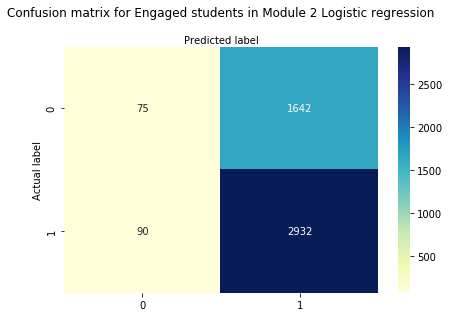

In [152]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnflr2_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout() 
plt.title('Confusion matrix for Engaged students in Module 2 Logistic regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


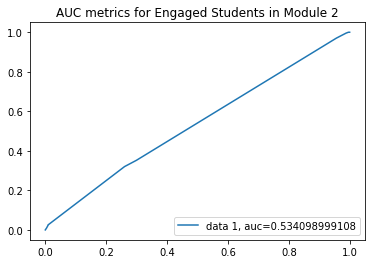

In [144]:
ylg2_pred_proba = logregfs2.predict_proba(Xfs2_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yfs2_test,  ylg2_pred_proba)
auc = metrics.roc_auc_score(yfs2_test, ylg2_pred_proba)
plt.title('AUC metrics for Engaged Students in Module 2')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


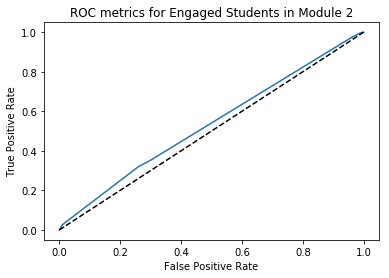

In [143]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yfs2_test, ylg2_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.title('ROC metrics for Engaged Students in Module 2')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [92]:

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logregfs2, Xfs2_train, yfs2_train, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC scores computed using 5-fold cross-validation: [ 0.53281045  0.53051973  0.5472122   0.53061582  0.53526542]


In [200]:
# Instantiate the classifier
rfclffs2 = RandomForestClassifier(n_estimators =20)

# Fit to the training data
rfclffs2.fit(Xfs2_train, yfs2_train)

# Compute accuracy
print(rfclffs2.score(Xfs2_test, yfs2_test))


0.634522051066


In [94]:
cvscores_10rf = cross_val_score(rfclffs2, Xfs2_train, yfs2_train, cv = 10)
print(np.mean(cvscores_10rf))

0.646404170872


In [95]:
from sklearn.svm import SVC

svcfs2 = SVC()

#Train it, or "fit it", to the data:
svcfs2.fit(Xfs2_train, yfs2_train)

# Compute accuracy
print(svcfs2.score(Xfs2_test, yfs2_test))


0.634522051066


In [96]:
cvscores_10svc = cross_val_score(svcfs2, Xfs2_train, yfs2_train, cv = 10)
print(np.mean(cvscores_10svc))

0.645227781663


In [ ]:
#Trimester1

In [202]:
FirstFive2.head(2)

,Time,User full name,Affected user,Event context,Component,Event name,Description,IP address,Origin,Date
1334,22:36,a2C9 bYpt,-,Course: Module 2,User report,Grade user report viewed,The user with id '0' viewed the user report in...,127.0.0.1,ws,2018-10-12
1335,22:36,a24R bwcW,-,Course: Module 2,System,Course viewed,The user with id '0' viewed the course with id...,127.0.0.1,web,2018-10-12


In [203]:
FirstFive2 = FirstFive2.drop(FirstFive2[['IP address','Origin','Description','Affected user']], axis=1)


In [204]:
FirstFive2.head(2)

,Time,User full name,Event context,Component,Event name,Date
1334,22:36,a2C9 bYpt,Course: Module 2,User report,Grade user report viewed,2018-10-12
1335,22:36,a24R bwcW,Course: Module 2,System,Course viewed,2018-10-12


In [205]:
FirstFive2_onehot = FirstFive2.copy()
FirstFive2_onehot = pd.get_dummies(FirstFive2_onehot, columns=['Event name'], prefix = ['Event name'])
FirstFive2_onehot = pd.get_dummies(FirstFive2_onehot, columns=['Event context'], prefix = ['Event context'])
FirstFive2_onehot = pd.get_dummies(FirstFive2_onehot, columns=['Component'], prefix = ['Component'])


print(FirstFive2_onehot.head())

###
#
# One-Hot encoding
# The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.
# This has the benefit of not weighting a value improperly.
# https://www.datacamp.com/community/tutorials/categorical-data



        Time User full name       Date  Event name_A file has been uploaded.  \
1334   22:36      a2C9 bYpt 2018-10-12                                     0   
1335   22:36      a24R bwcW 2018-10-12                                     0   
1336   22:22      an9y b7rk 2018-10-12                                     0   
1337   22:22      an9y b7rk 2018-10-12                                     0   
1338   22:21      an9y b7rk 2018-10-12                                     0   

      Event name_A submission has been submitted.  \
1334                                            0   
1335                                            0   
1336                                            0   
1337                                            0   
1338                                            0   

      Event name_Badge listing viewed  \
1334                                0   
1335                                0   
1336                                0   
1337                                

In [206]:
FirstFive2_onehot.head(2)

,Time,User full name,Date,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course searched,Event name_Course user report viewed,...,Event context_URL: The Art of 'Digging Deeper' ClipArt,Event context_URL: Very Helpful Library Resources,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_System,Component_URL,Component_User report
1334,22:36,a2C9 bYpt,2018-10-12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1335,22:36,a24R bwcW,2018-10-12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [207]:
# new data frame with split value columns 
new2a = FirstFive2_onehot["User full name"].str.split(" ", n = 1, expand = True)


In [208]:
# making separate first name column from new data frame 
FirstFive2_onehot["First name"]= new2[0] 

# making separate last name column from new data frame 
FirstFive2_onehot["Last name"]= new2[1] 


In [209]:
FirstFive2_onehot.head(2)

,Time,User full name,Date,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course searched,Event name_Course user report viewed,...,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_System,Component_URL,Component_User report,First name,Last name
1334,22:36,a2C9 bYpt,2018-10-12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,a2C9,bYpt
1335,22:36,a24R bwcW,2018-10-12,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,a24R,bwcW


In [210]:
#Merge_subset2
merge_subset2_tri = pd.merge(FirstFive2_onehot,m2mg_subset[['First name','engaged']],on='First name', how='left')

In [211]:
merge_subset2_tri.head(2)

,Time,User full name,Date,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course searched,Event name_Course user report viewed,...,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_System,Component_URL,Component_User report,First name,Last name,engaged
0,22:36,a2C9 bYpt,2018-10-12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,a2C9,bYpt,0
1,22:36,a24R bwcW,2018-10-12,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,a24R,bwcW,1


In [212]:
X52s = merge_subset2_tri.iloc[:,4:70]  #independent columns
y52s = merge_subset2_tri.iloc[:,-1]    #target column i.e engaged


In [213]:
X52s.head(2)

,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course searched,Event name_Course user report viewed,Event name_Course viewed,Event name_Discussion viewed,Event name_Grade overview report viewed,Event name_Grade user report viewed,...,Event context_URL: The Art of 'Digging Deeper' ClipArt,Event context_URL: Very Helpful Library Resources,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_System,Component_URL,Component_User report
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [214]:
y52s.head(2)

0    0
1    1
Name: engaged, dtype: int64

In [215]:

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X52s,y52s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X52s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36


                                                Specs     Score
19  Event context_Assignment: UPLOAD ASSIGNMENT 1 ...  8.335475
58                               Component_Assignment  7.277503
32  Event context_File: Lab Activity 1 - Referenci...  6.622807
6                            Event name_Course viewed  6.343533
50  Event context_URL: Lab Activity 1 - What is Pl...  6.335211
14  Event name_The status of the submission has be...  4.815816
41  Event context_URL: 7 Expert Secrets to Improvi...  4.393602
63                                   Component_System  4.337653
21                     Event context_Course: Module 2  3.874688
8             Event name_Grade overview report viewed  3.634522


[ 0.00040701  0.01937179  0.03172437  0.03270548  0.01441403  0.01194933
  0.04170261  0.00214175  0.01173204  0.01362585  0.00186533  0.00355178
  0.00468986  0.01917402  0.02540132  0.00451404  0.00562206  0.02307682
  0.00071395  0.04607208  0.02109003  0.01638463  0.00364015  0.00491647
  0.00322337  0.00079296  0.00019994  0.02460467  0.02856494  0.0189504
  0.00054026  0.01615285  0.06518476  0.02013012  0.00215674  0.00584488
  0.00741733  0.00486685  0.0119166   0.00126049  0.01385876  0.0338399
  0.00266591  0.00800039  0.00184601  0.00276436  0.00636481  0.0245563
  0.01621294  0.02093231  0.06682455  0.00116152  0.03108963  0.01317562
  0.00549181  0.00513376  0.02306944  0.00667769  0.06466401  0.00751001
  0.00642298  0.01818073  0.02512129  0.01718745  0.00371799  0.0012359 ]


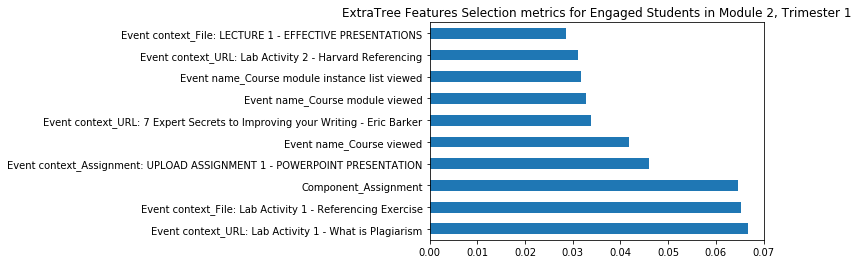

In [216]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X52s,y52s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X52s.columns)
plt.title('ExtraTree Features Selection metrics for Engaged Students in Module 2, Trimester 1')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


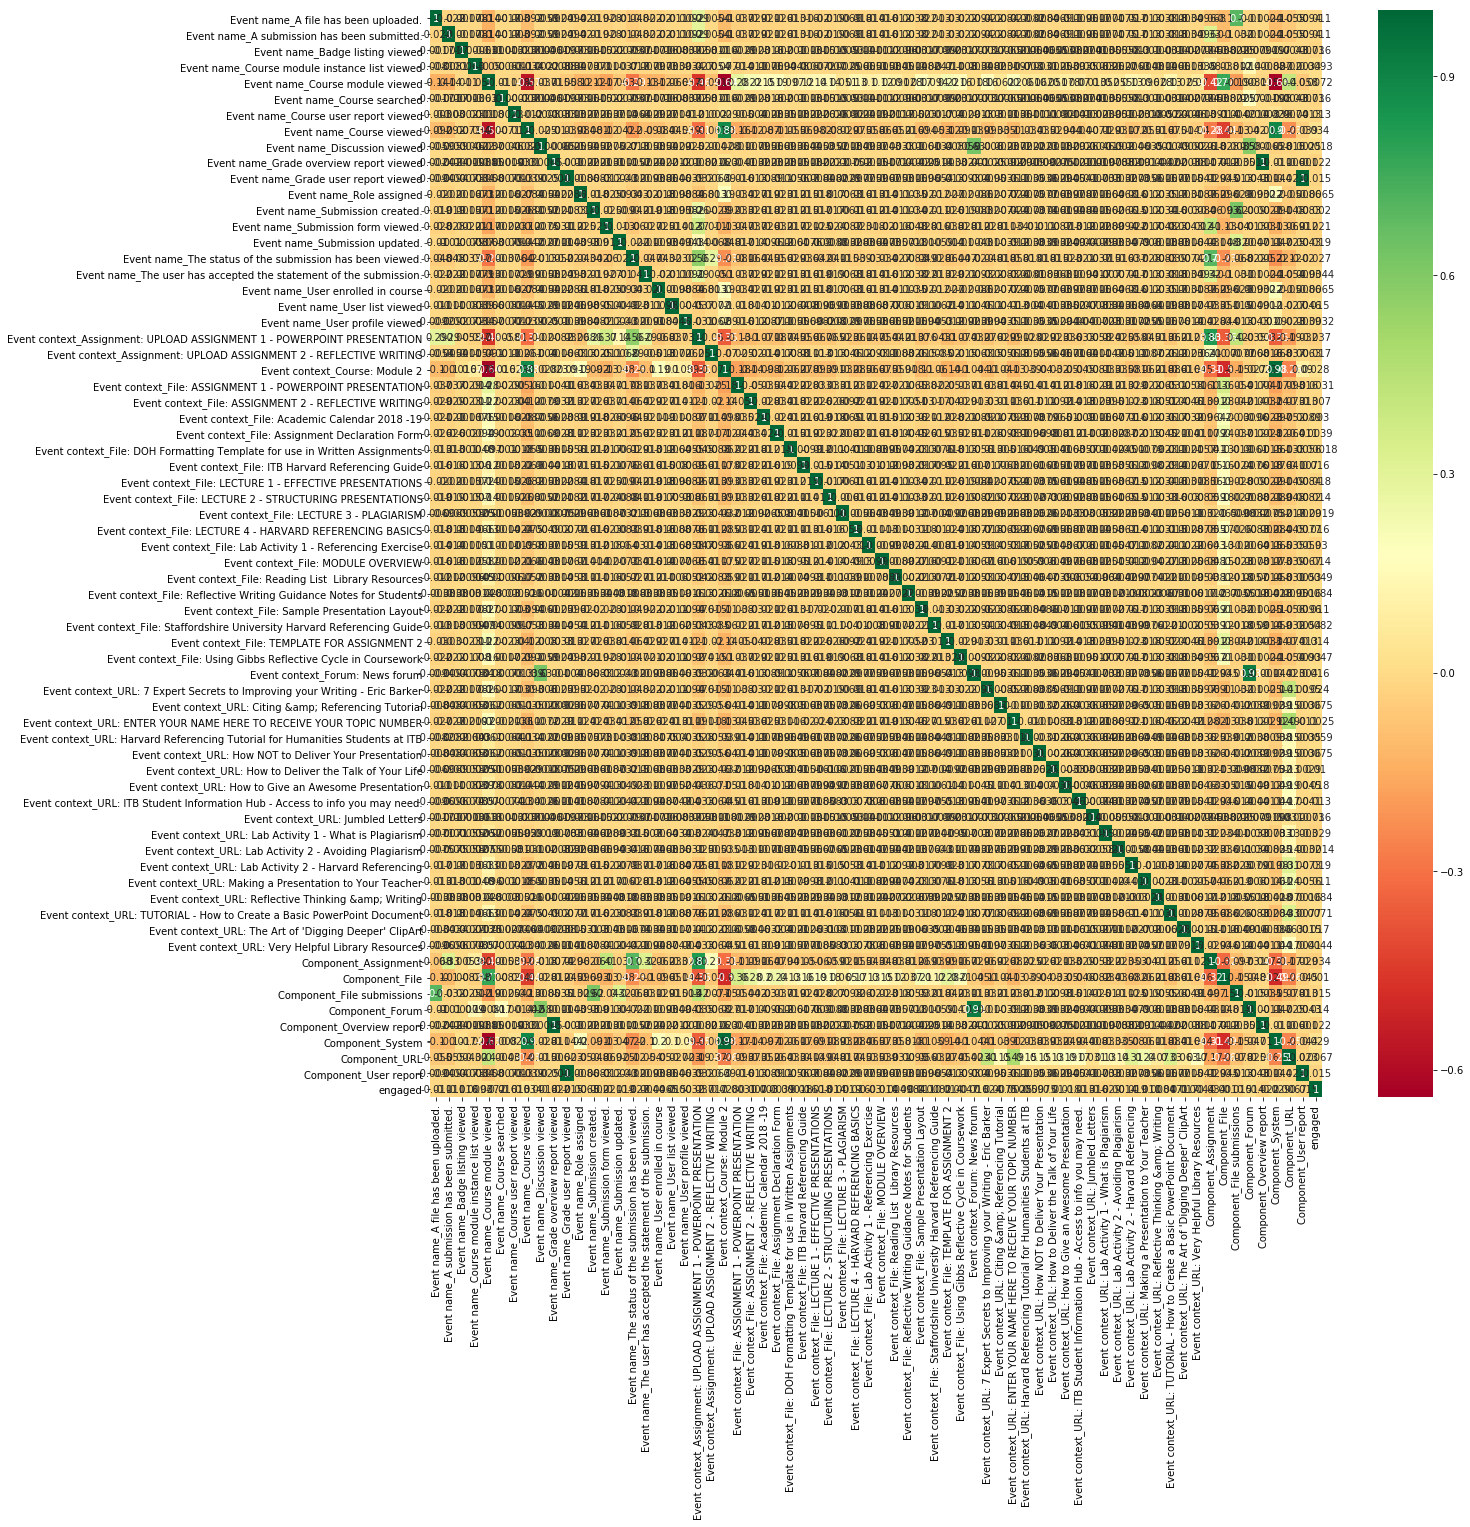

In [217]:
#get correlations of each features in dataset
corrmat = merge_subset2_tri.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset2_tri[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [218]:
X52s.columns

Index(['Event name_A submission has been submitted.',
       'Event name_Badge listing viewed',
       'Event name_Course module instance list viewed',
       'Event name_Course module viewed', 'Event name_Course searched',
       'Event name_Course user report viewed', 'Event name_Course viewed',
       'Event name_Discussion viewed',
       'Event name_Grade overview report viewed',
       'Event name_Grade user report viewed', 'Event name_Role assigned',
       'Event name_Submission created.', 'Event name_Submission form viewed.',
       'Event name_Submission updated.',
       'Event name_The status of the submission has been viewed.',
       'Event name_The user has accepted the statement of the submission.',
       'Event name_User enrolled in course', 'Event name_User list viewed',
       'Event name_User profile viewed',
       'Event context_Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION',
       'Event context_Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING',

In [ ]:
#  Event context_Assignment: UPLOAD ASSIGNMENT 1 ...  8.335475
#58                               Component_Assignment  7.277503
#32  Event context_File: Lab Activity 1 - Referenci...  6.622807
#6                            Event name_Course viewed  6.343533
#50  Event context_URL: Lab Activity 1 - What is Pl...  6.335211
#14  Event name_The status of the submission has be...  4.815816
#41  Event context_URL: 7 Expert Secrets to Improvi...  4.393602
#63                                   Component_System  4.337653
#21                     Event context_Course: Module 2  3.874688
#8             Event name_Grade overview report viewed  3.634522

In [219]:
feattime52 = X52s[['Event context_Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION','Component_Assignment','Event context_File: Lab Activity 1 - Referencing Exercise','Event name_Course viewed','Event context_URL: Lab Activity 1 - What is Plagiarism','Event name_The status of the submission has been viewed.','Event context_URL: 7 Expert Secrets to Improving your Writing - Eric Barker','Component_System','Event context_Course: Module 2','Event name_Grade overview report viewed']]

In [220]:
Xt2a = feattime52 # Features
yt2a = y52s # Target variable

In [221]:
# Create training and testing sets
Xt2a_train, Xt2a_test, yt2a_train, yt2a_test = train_test_split(Xt2a, yt2a, test_size=0.3)


In [222]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregt2a = LogisticRegression()

# fit the model with data
logregt2a.fit(Xt2a_train,yt2a_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [223]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(logregt2a, Xt2a_train, yt2a_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(logregt2a, Xt2a_train, yt2a_train, cv = 10)
print(np.mean(cvscores_10))

0.641103244836
0.642435736469


In [224]:
yt2a_pred=logregt2a.predict(Xt2a_test)

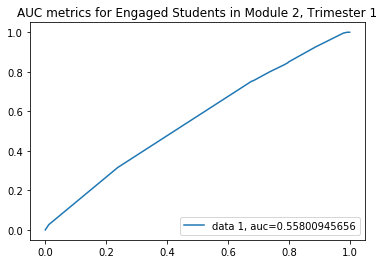

In [225]:
ylg2a_pred_proba = logregt2a.predict_proba(Xt2a_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt2a_test,  ylg2a_pred_proba)
auc = metrics.roc_auc_score(yt2a_test, ylg2a_pred_proba)
plt.title('AUC metrics for Engaged Students in Module 2, Trimester 1')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score for the case is 0.52. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


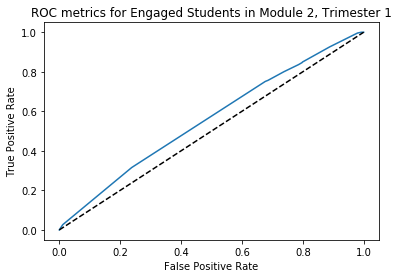

In [226]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yt2a_test, ylg2a_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.title('ROC metrics for Engaged Students in Module 2, Trimester 1')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [227]:
# Perform 10-fold CV
cvscores_2a = cross_val_score(logregt2a, Xt2a_train, yt2a_train, cv = 10)
print(np.mean(cvscores_2a))

0.642435736469


In [228]:
print("Accuracy:",metrics.accuracy_score(yt2a_test, yt2a_pred))
print("Precision:",metrics.precision_score(yt2a_test, yt2a_pred))
print("Recall:",metrics.recall_score(yt2a_test, yt2a_pred))
print("F1 Score",metrics.f1_score(yt2a_test, yt2a_pred))


Accuracy: 0.651131824234
Precision: 0.651131824234
Recall: 1.0
F1 Score 0.788709677419


In [235]:
# Instantiate the classifier
rfclffs2a = RandomForestClassifier(n_estimators =10)

# Fit to the training data
rfclffs2a.fit(Xt2a_train, yt2a_train)

# Compute accuracy
print(rfclffs2a.score(Xt2a_test, yt2a_test))


0.64891256103


In [126]:
# Perform 10-fold CV
cvscores_10rf = cross_val_score(rfclffs2a, Xt2a_train, yt2a_train, cv = 10)
print(np.mean(cvscores_10rf))

0.643008978415


In [127]:
from sklearn.svm import SVC

svcfs2a = SVC()

#Train it, or "fit it", to the data:
svcfs2a.fit(Xt2a_train, yt2a_train)

# Compute accuracy
print(svcfs2a.score(Xt2a_test, yt2a_test))


0.645361739902


In [128]:
# Perform 10-fold CV
cvscores_10svc = cross_val_score(svcfs2a, Xt2a_train, yt2a_train, cv = 10)
print(np.mean(cvscores_10svc))

0.644719641527


In [135]:
# Create Decision Tree classifer object
dtclffs2a = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtclffs2a = dtclffs2a.fit(Xt2a_train,yt2a_train)

#Predict the response for test dataset
yfs2a_pred = dtclffs2a.predict(Xt2a_test)


NameError: name 'Xt2a_train' is not defined

In [134]:
# Compute accuracy
print(dtclffs2a.score(Xfs2a_train, yfs2a_train))

NameError: name 'dtclffs2a' is not defined

In [131]:
# Perform 10-fold CV
cvscores_10dt2a = cross_val_score(dtclffs2a, Xt2a_train, yt2a_train, cv = 10)
print(np.mean(cvscores_10dt2a))

0.641486255257


In [132]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yt2a_test, yt2a_pred))
print(classification_report(yt2a_test, yt2a_pred))


[[   2  797]
 [   2 1452]]
             precision    recall  f1-score   support

          0       0.50      0.00      0.00       799
          1       0.65      1.00      0.78      1454

avg / total       0.59      0.65      0.51      2253



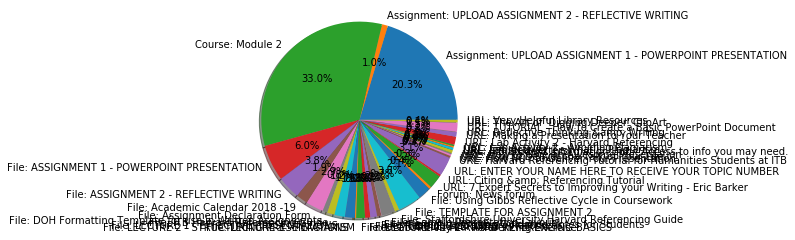

In [100]:
labels = FirstFive2['Event context'].astype('category').cat.categories.tolist()
counts = FirstFive2['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [101]:
FirstFive2["Event context"].value_counts()
# The Most frequent are assignment: upload assignment 1
# 

Course: Module 2                                                    2476
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION           1527
File: ASSIGNMENT 1 - POWERPOINT PRESENTATION                         449
File: TEMPLATE FOR ASSIGNMENT 2                                      289
File: ASSIGNMENT 2 - REFLECTIVE WRITING                              285
URL: ENTER YOUR NAME HERE TO RECEIVE YOUR TOPIC NUMBER               235
File: Assignment Declaration Form                                    218
File: Sample Presentation Layout                                     168
URL: 7 Expert Secrets to Improving your Writing - Eric Barker        166
File: Using Gibbs Reflective Cycle in Coursework                     159
File: Academic Calendar 2018 -19                                     145
File: LECTURE 1 - EFFECTIVE PRESENTATIONS                            129
File: LECTURE 2 - STRUCTURING PRESENTATIONS                          123
URL: TUTORIAL - How to Create a Basic PowerPoint Do

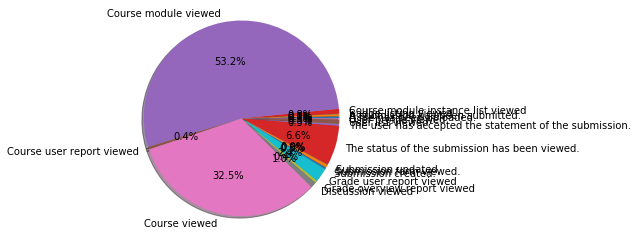

In [102]:
labels = FirstTen2['Event name'].astype('category').cat.categories.tolist()
counts = FirstTen2['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [103]:
FirstTen2["Event context"].value_counts()


Course: Module 2                                                               1528
File: TEMPLATE FOR ASSIGNMENT 2                                                 235
File: ASSIGNMENT 2 - REFLECTIVE WRITING                                         230
File: Lab Activity 2 - Evaluating Information                                   197
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION                       176
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING                            170
URL: Lab Activity 1 - Evaluating Information                                    161
File: Assignment Declaration Form                                               153
File: Using Gibbs Reflective Cycle in Coursework                                149
URL: ENTER YOUR NAME HERE TO RECEIVE YOUR TOPIC NUMBER                          109
URL: Lab Activity 2 - Harvard Referencing                                        91
File: ITB Harvard Referencing Guide                                         

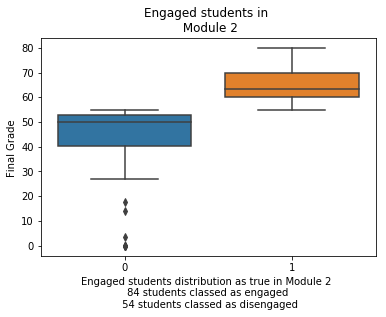

In [157]:
sns.boxplot(x = 'engaged', y = 'Course total (Real)', data = module2mg)
plt.title('Engaged students in \n Module 2')
plt.xlabel('Engaged students distribution as true in Module 2 \n 84 students classed as engaged \n 54 students classed as disengaged')
plt.ylabel('Final Grade ')

In [155]:
engaged2.sum()

84

In [158]:
chi = stats.chisquare(engaged2)
print(chi)

Power_divergenceResult(statistic=54.0, pvalue=0.9999999999833814)


In [172]:
# Is the result significant?
alpha = 0.05
if chi[1] < alpha:
    print("Proportions of engagement differ significantly")
else:
    print("No significant difference in proportions of engagement found")

No significant difference in proportions of engagement found


In [ ]:
#MissingValues

In [173]:
merge_subset2_nullity = merge_subset2.isnull()

In [174]:
merge_subset2_nullity.mean() * 100


# Calculate percentage of missing values
missing_values_percent = merge_subset2_nullity.mean() * 100
print('Percentage of Missing Values:\n', missing_values_percent)

# 5.8 percent of missing values

Percentage of Missing Values:
 Time                                                                             0.0
User full name                                                                   0.0
Date                                                                             0.0
First name                                                                       0.0
Last name                                                                        0.0
Event name_A file has been uploaded.                                             0.0
Event name_A submission has been submitted.                                      0.0
Event name_Badge listing viewed                                                  0.0
Event name_Course module instance list viewed                                    0.0
Event name_Course module viewed                                                  0.0
Event name_Course searched                                                       0.0
Event name_Course user report view

In [178]:
# Perform Shapiro-Wilk test on Engagement and print result
shapirodis = stats.shapiro(merge_subset2.engaged)
print(shapirodis)

(0.6059455871582031, 0.0)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [179]:
# Perform Shapiro-Wilk test on Engagement and print result
shapirodis = stats.shapiro(merge_subset2_tri.engaged)
print(shapirodis)

(0.6053218841552734, 0.0)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [96]:
Powerfeatselect2 = merge_subset2[['Component_User report','Event name_Grade overview report viewed','Component_Overview report','Event context_File: Lab Activity 2 - Evaluating Information','Component_Forum','Event name_Course viewed','Component_System','Event context_Forum: News forum','Event context_URL: Reflective Thinking &amp; Writing','engaged']]

In [97]:
Powerfeatselect2.groupby(['engaged']).mean()

,Component_User report,Event name_Grade overview report viewed,Component_Overview report,Event context_File: Lab Activity 2 - Evaluating Information,Component_Forum,Event name_Course viewed,Component_System,Event context_Forum: News forum,Event context_URL: Reflective Thinking &amp; Writing
engaged,,,,,,,,,
0,0.036373,0.004081,0.004081,0.006920,0.004436,0.261710,0.296132,0.003903,0.008162
1,0.021362,0.000492,0.000492,0.015751,0.011223,0.298484,0.333038,0.009155,0.003938


In [132]:
Powerfeatselect33 = merge_subset2[['Event context_File: Lab Activity 2 - Evaluating Information','Component_Overview report','Event name_Course viewed','Component_User report','Event context_File: 2. Work/Life Balance Calculator','Component_Forum','Event context_URL: Reflective Thinking &amp; Writing','Event name_Course module instance list viewed','Event context_URL: Lab Activity 1 - What is Plagiarism','Event context_File: ITB Harvard Referencing Guide','engaged']]

In [133]:
Powerfeatselect33.groupby(['engaged']).mean()

,Event context_File: Lab Activity 2 - Evaluating Information,Component_Overview report,Event name_Course viewed,Component_User report,Event context_File: 2. Work/Life Balance Calculator,Component_Forum,Event context_URL: Reflective Thinking &amp; Writing,Event name_Course module instance list viewed,Event context_URL: Lab Activity 1 - What is Plagiarism,Event context_File: ITB Harvard Referencing Guide
engaged,,,,,,,,,,
0,0.006920,0.004081,0.261710,0.036373,0.003549,0.004436,0.008162,0.002484,0.003549,0.009759
1,0.015751,0.000492,0.298484,0.021362,0.007777,0.011223,0.003938,0.006399,0.001280,0.014865


In [197]:
from scipy.stats import mannwhitneyu
mannwhitneyu(Powerfeatselect33.engaged, m2mg_subset.engaged)

MannwhitneyuResult(statistic=1052232.0, pvalue=0.20013501527777161)

In [198]:
# Perform Wilcoxon Signed-Rank test
wilcsr = stats.wilcoxon(Powerfeatselect33.engaged,m2mg_subset.engaged)
print(wilcsr)
#Look at the p-values from the Wilcoxon test. Note that they are actually (more significant)

ValueError: Unequal N in wilcoxon.  Aborting.

In [10]:
final2 = module2mg['Course total (Real)'] 

In [11]:
final2

0      52.30
1      56.55
2      50.80
3      69.90
4      60.25
5      73.30
6      36.55
7      66.10
8      60.80
9      69.00
10     54.90
11     56.00
12     55.70
13     60.60
14     76.70
15     60.05
16     47.05
17     61.60
18     58.10
19     59.45
20     50.40
21     26.85
22     64.65
23     62.90
24     55.25
25     78.00
26      0.00
27     54.80
28     69.75
29     50.00
       ...  
108    75.80
109    55.20
110    49.40
111    66.10
112    63.80
113    39.50
114    54.20
115    60.00
116    73.30
117    57.80
118    74.80
119    60.15
120    62.20
121    63.25
122    50.60
123    72.10
124    17.65
125    37.05
126    63.90
127    66.60
128    61.80
129    59.90
130    65.10
131    62.35
132    67.40
133    67.90
134    61.18
135    53.75
136    71.30
137    53.20
Name: Course total (Real), Length: 138, dtype: float64

In [12]:
mean_grades, sims = [], 1000


In [13]:
for i in range(sims):
    temp_sample = np.random.choice(final2, replace=True, size=len(final2))
    sample_mean = np.mean(temp_sample)
    mean_grades.append(sample_mean)

In [14]:
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_grades)
boot_95_ci = np.percentile(mean_grades, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))

Bootstrapped Mean Length = 55.64869702898551, 95% CI = [ 52.60180797  58.40996739]
